In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

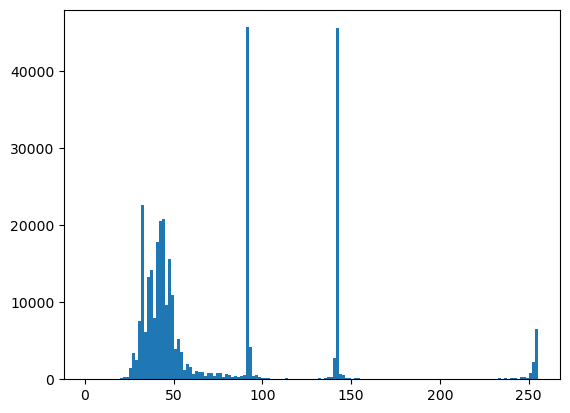

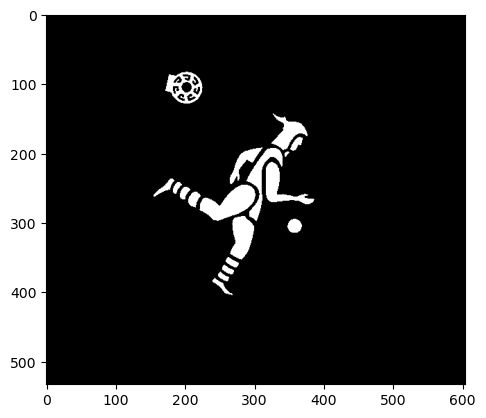

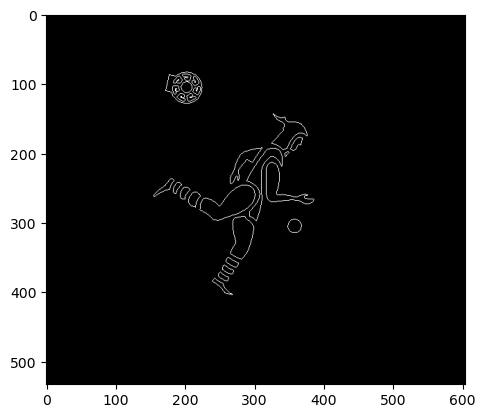

In [ ]:
#Imagen en escala de grises
imagen = cv2.imread('imagen.jpeg', cv2.IMREAD_GRAYSCALE)
#umbral = np.median(imagen.flatten())
#umbral = np.percentile(imagen.flatten(), 75) 

umbral = 220
plt.hist(imagen.flatten(), bins = 150)
plt.show()
_, imagen_bin = cv2.threshold(imagen, umbral, imagen.max(), cv2.THRESH_BINARY)
plt.imshow(imagen_bin, cmap='gray')
plt.show()


visitados = np.zeros(imagen_bin.shape, dtype=np.uint8)
bordes = np.zeros(imagen_bin.shape, dtype=np.uint8)

for i in range(imagen_bin.shape[0]):
    for j in range(imagen_bin.shape[1]):
        if imagen_bin[i][j] == 255 and visitados[i][j] == 0:
            cola = [(i, j)]
            visitados[i][j] = 1
            
            while cola:
                pixel = cola.pop(0)
                es_borde = False
                
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    ni, nj = pixel[0] + dx, pixel[1] + dy
                    
                    if ni < 0 or ni >= imagen_bin.shape[0] or nj < 0 or nj >= imagen_bin.shape[1]:
                        continue
                    
                    if imagen_bin[ni][nj] == 0:
                        bordes[pixel[0], pixel[1]] = 255
                    elif visitados[ni][nj] == 0:
                        visitados[ni][nj] = 1
                        cola.append((ni, nj))
                
                if es_borde:
                    bordes[pixel[0], pixel[1]] = 255

plt.imshow(bordes, cmap='gray')
plt.show()